In [3]:
from datetime import datetime
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## Data Preparation

Dataset source: http://www.vicos.si/Downloads/FIDS30		

### Create train and test directories into new dataset folder

### Plot a few random photos

### Copy all files from all subdirectories of original dataset folder into new dataset folder

Next, we can enumerate all image files in the new dataset folder and copy them into train/test class 1, class 2, class x(e.g aceloras/, apples/ or apricots/) subdirectory based on their filename.

Additionally, we can randomly decide to hold back 20% of the images into the test dataset. This is done consistently by fixing the seed for the pseudorandom number generator so that we get the same split of data each time the code is run.

### Select Standardized Photo Size

The photos will have to be reshaped prior to modeling so that all images have the same shape. This is often a small square image.

There are many ways to achieve this, although the most common is a simple resize operation that will stretch and deform the aspect ratio of each image and force it into the new shape.

We could load all photos and look at the distribution of the photo widths and heights, then design a new photo size that best reflects what we are most likely to see in practice.

Smaller inputs mean a model that is faster to train, and typically this concern dominates the choice of image size.

### Develop a Baseline CNN Model

In this section, we will develop a baseline Convolutional Neural Network model for the FIDS30 dataset.

A baseline model will establish a minimum model performance to which all of our other models can be compared, as well as a model architecture that we can use as the basis of study and improvement.

We will use for starting point the general architectural principles of the VGG models. These are a good starting point because they achieved top performance in the ILSVRC 2014 competition and because the modular structure of the architecture is easy to understand and implement. 

The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. Padding is used on the convolutional layers to ensure the height and width shapes of the output feature maps matches the inputs.

We can create a function named define_model() that will define a model and return it ready to be fit on the dataset. This function can then be customized to define different baseline models, e.g. versions of the model with 1, 2, or 3 VGG style blocks.

The model will be fit with Stochastic Gradient Descent and we will start with a conservative learning rate of 0.001 and a momentum of 0.9.

### One Block VGG Model

The one-block VGG model has a single convolutional layer with 32 filters followed by a max pooling layer.

In [1]:
from datetime import datetime

# baseline model for the dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

from src.fruits.helper import *

start = datetime.now()
print('Start time: ', start)

num_classes = 30

# Defining the hyperparameters
filters = 32
filtersize = (3,3)
epochs_nr = 20
batchsize = 64
input_shape = (224,224,3)
target_size = (224,224)

# define cnn model
def define_model_1_block():
    # The Sequential model is a linear stack of layers. You can also simply add layers via the .add() method.
    model = Sequential()
    # 
    model.add(Conv2D(filters, filtersize, activation='relu', kernel_initializer='he_uniform', padding='same', input_shape = input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    # define a loss function 
    loss_function = 'categorical_crossentropy'
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss=loss_function, metrics=['accuracy'])
    model.summary()
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    # subplot(nrows, ncols, plot_number)
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_1_block():
    # define model
    model = define_model_1_block()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    fruit_data = FIDS30DataSet(path="/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", images=False)
    (df_train, df_test) = fruit_data.getDataFrames(ratio=0.3)

    train_it = datagen.flow_from_dataframe(df_train, batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_dataframe(df_test, batch_size=64, target_size=(224, 224))

    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs = epochs_nr, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    print('Plots...')
    summarize_diagnostics(history)
    model.save('model_1_block.h5')

# entry point, run the test harness
run_test_1_block()

stop = datetime.now()
print('Stop time: ', stop)
print('Training time: ', stop - start)

Using TensorFlow backend.
W0807 12:20:29.051885 139686126925568 deprecation_wrapper.py:119] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 12:20:29.074297 139686126925568 deprecation_wrapper.py:119] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 12:20:29.078550 139686126925568 deprecation_wrapper.py:119] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 12:20:29.102185 139686126925568 deprecation_wrapper.py:119] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras/backend/tensorflow

Start time:  2019-08-07 12:20:29.050525
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51380352  
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3870      
Total params: 51,385,118
Trainable params: 51,385,118
Non-trainable params: 0
_________________________________________________________________
0


W0807 12:20:29.366547 139686126925568 deprecation.py:323] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 12:20:29.434652 139686126925568 deprecation_wrapper.py:119] From /home/lazafi/labor/ml-2019/male2019/3/env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Found 679 validated image filenames belonging to 30 classes.
Found 292 validated image filenames belonging to 30 classes.
> 5.822
Plots...
Stop time:  2019-08-07 12:31:59.659034
Training time:  0:11:30.608509


### Four Block VGG Model

In [ ]:
start = datetime.now()
print('Start time: ', start)

# define cnn model
def define_model_4_block():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(30, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_4_block():
    # define model
    model = define_model_4_block()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    
    fruit_data = FIDS30DataSet(path="/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", images=False)
    (df_train, df_test) = fruit_data.getDataFrames(ratio=0.3)

    train_it = datagen.flow_from_dataframe(df_train, batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_dataframe(df_test, batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    print('Plots...')
    summarize_diagnostics(history)
    model.save('model_4_block.h5')
    
# entry point, run the test harness
run_test_4_block()

stop = datetime.now()
print('Stop time: ', stop)
print('Training time: ', stop - start)

Start time:  2019-08-07 12:33:54.157208
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 

### Image Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

Data augmentation can also act as a regularization technique, adding noise to the training data, and encouraging the model to learn the same features, invariant to their position in the input.

Small changes to the input photos might be useful for this problem, such as small shifts and horizontal flips. These augmentations can be specified as arguments to the ImageDataGenerator used for the training dataset. The augmentations should not be used for the test dataset, as we wish to evaluate the performance of the model on the unmodified photographs.

This requires that we have a separate ImageDataGenerator instance for the train and test dataset, then iterators for the train and test sets created from the respective data generators.

This approach is expected to slow the rate of improvement during training and hopefully counter the overfitting of the training dataset. As such, we will increase the number of training epochs from 20 to 50 to give the model more space for refinement.

In [4]:
from datetime import datetime
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

start = datetime.now()
print('Start time: ', start)

# define cnn model
def define_model_data_augmentation():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(30, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_data_augmentation():
    # define model
    model = define_model_data_augmentation()
    # create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterator
     # prepare iterators
    fruit_data = FIDS30DataSet(path="/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", images=False)
    (df_train, df_test) = fruit_data.getDataFrames(ratio=0.3)

    train_it = datagen.flow_from_dataframe(df_train, batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_dataframe(df_test, batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    model.save('model_data_augmentation.h5')

# entry point, run the test harness
run_test_data_augmentation()

stop = datetime.now()
print('Stop time: ', stop)
print('Training time: ', stop - start)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 56, 56, 128)       73856     
__________

### Discussion

We have explored two different models with a VGG-based architecture.

The results can be summarized below, although we must assume some variance in these results given the stochastic nature of the algorithm:

    VGG 1: 27.933 %
    VGG 4: 39.665 %
    
With one different improvements to the baseline model:

    Baseline VGG4 + Data Augmentation: 53.073 %

As suspected, the addition of regularization techniques slows the progression of the learning algorithms and reduces overfitting, resulting in improved performance on the holdout dataset.

### Explore Transfer Learning

Transfer learning involves using all or parts of a model trained on a related task.

Keras provides a range of pre-trained models that can be loaded and used wholly or partially via the Keras Applications API.

A useful model for transfer learning is one of the VGG models, such as VGG-16 with 16 layers that at the time it was developed, achieved top results on the ImageNet photo classification challenge.

The model is comprised of two main parts, the feature extractor part of the model that is made up of VGG blocks, and the classifier part of the model that is made up of fully connected layers and the output layer.

We can use the feature extraction part of the model and add a new classifier part of the model that is tailored to the our dataset. Specifically, we can hold the weights of all of the convolutional layers fixed during training, and only train new fully connected layers that will learn to interpret the features extracted from the model and make a multiclass classification.

This can be achieved by loading the VGG-16 model, removing the fully connected layers from the output-end of the model, then adding the new fully connected layers to interpret the model output and make a prediction. The classifier part of the model can be removed automatically by setting the “include_top” argument to “False“, which also requires that the shape of the input also be specified for the model, in this case (224, 224, 3). This means that the loaded model ends at the last max pooling layer, after which we can manually add a flatten layer and the new clasifier layers.

We will generate our training data using the Keras ImageDataGenerator. 

The ImageDataGenerator will make an X_training data from a directory. The sub-directory in that directory will be used as a class for each object. The image will be loaded with the RGB color mode, with the categorical class mode for the Y_training data, with a batch size of 64. Finally, shuffle the data. 

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

train_path = new_dataset_path + 'train'
test_path = new_dataset_path + 'test'

# Defining the hyperparameters
batch_size = 64
image_size = 224
num_class = 30


train_datagen = ImageDataGenerator(validation_split=0.3,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
# prepare iterators
fruit_data = FIDS30DataSet(path="/home/lazafi/labor/ml-2019/male2019/3/data/FIDS30", images=False)
(df_train, df_test) = fruit_data.getDataFrames(ratio=0.3)

train_generator = train_datagen.flow_from_dataframe(df_train,
                                target_size=(image_size,image_size),
                                batch_size=batch_size,
                                class_mode='categorical',
                                color_mode='rgb',
                                shuffle=True)

Found 792 images belonging to 30 classes.


Let's see our images randomly by plotting them with matplotlib

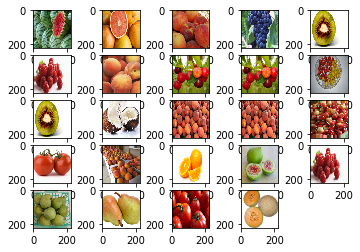

In [7]:
x_batch, y_batch = train_generator.next()

fig=plt.figure()
columns = 5
rows = 5
for i in range(1, columns*rows):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.int)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

After that let's create our network model from VGG16 with imageNet pre-trained weight. We will freeze these layers so that the layers are not trainable to help us reduce the computation time.

### Creating our Model from VGG16

As you can see below, the summary of our network model. From an input from VGG16 Layers, then we add 2 Fully Connected Layer which will extract 1024 features and an output layer that will compute the 8 classes with the softmax activation. 

In [8]:
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16


#Load the VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

print(base_model.summary())

    # Freeze the layers 
for layer in base_model.layers:
    layer.trainable = False
 
# # Create the model
model = keras.models.Sequential()

# # Add the vgg convolutional base model
model.add(base_model)
 
# # Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_class, activation='softmax'))
 
# # Show a summary of the model. Check the number of trainable parameters    
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### Training

Epoch 1/10
13/12 [===============================] - 98s 8s/step - loss: 12.1547 - acc: 0.1088
Epoch 2/10
13/12 [===============================] - 89s 7s/step - loss: 8.6748 - acc: 0.2749
Epoch 3/10
13/12 [===============================] - 78s 6s/step - loss: 5.7509 - acc: 0.4866
Epoch 4/10
13/12 [===============================] - 94s 7s/step - loss: 4.2085 - acc: 0.5839
Epoch 5/10
13/12 [===============================] - 79s 6s/step - loss: 3.3156 - acc: 0.6830
Epoch 6/10
13/12 [===============================] - 31s 2s/step - loss: 2.9178 - acc: 0.7053
Epoch 7/10
13/12 [===============================] - 30s 2s/step - loss: 2.0064 - acc: 0.7791
Epoch 8/10
13/12 [===============================] - 30s 2s/step - loss: 1.3185 - acc: 0.8346
Epoch 9/10
13/12 [===============================] - 30s 2s/step - loss: 0.9847 - acc: 0.8466
Epoch 10/10
13/12 [===============================] - 30s 2s/step - loss: 0.8680 - acc: 0.8738


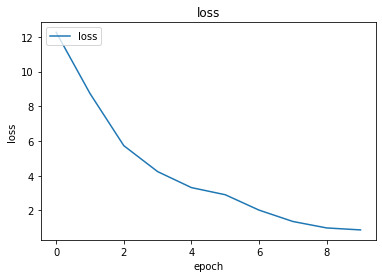

In [9]:
# # Compile the model
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1e-3),
              metrics=['accuracy'])

# # Start the training process
# model.fit(x_train, y_train, validation_split=0.30, batch_size=32, epochs=50, verbose=2)

history = model.fit_generator(
                train_generator,
                steps_per_epoch = train_generator.n/batch_size,
                epochs=10)
        
model.save('fruits_VGG16.h5')

# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

As you can see, our losses are dropped significantly and the accuracy is almost 88%.

In [10]:
hist = history.history
hist.keys()

dict_keys(['loss', 'acc'])

### Testing Our Model

Found 792 images belonging to 30 classes.
Found 179 images belonging to 30 classes.


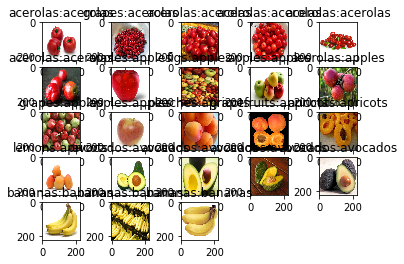

In [12]:
model = load_model('fruits_VGG16.h5')

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_dataframe(df_train,
                        target_size = (image_size,image_size),
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        color_mode = 'rgb',
                        shuffle=True)

test_generator = test_datagen.flow_from_dataframe(df_test,
                        target_size = (image_size, image_size),
                        color_mode = 'rgb',
                        shuffle = False,
                        class_mode = 'categorical',
                        batch_size = 1)

filenames = test_generator.filenames
nb_samples = len(filenames)

fig = plt.figure()
columns = 5
rows = 5
for i in range(1, columns*rows -1):
    x_batch, y_batch = test_generator.next()

    name = model.predict(x_batch)
    name = np.argmax(name, axis=-1)
    true_name = y_batch
    true_name = np.argmax(true_name, axis=-1)

    label_map = (test_generator.class_indices)
    label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
    predictions = [label_map[k] for k in name]
    true_value = [label_map[k] for k in true_name]

    image = x_batch[0].astype(np.int)
    fig.add_subplot(rows, columns, i)
    plt.title(str(predictions[0]) + ':' + str(true_value[0]))
    plt.imshow(image)
plt.show()